<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Visualizing-High-Dimensional-Features" data-toc-modified-id="Visualizing-High-Dimensional-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing High Dimensional Features</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Verifying-the-scaling" data-toc-modified-id="Verifying-the-scaling-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Verifying the scaling</a></span></li><li><span><a href="#Calculate-the-PCA-transformation" data-toc-modified-id="Calculate-the-PCA-transformation-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Calculate the PCA transformation</a></span></li></ul></li><li><span><a href="#Saving-the-data" data-toc-modified-id="Saving-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Saving the data</a></span></li></ul></li></ul></div>

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is analyzing data sets to summarize their main characteristics such as mean, standard deviation, and count, so on, often with visual methods to discover useful information.

 ### Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from datetime import datetime, date, timedelta

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid') 
# plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./Data/01_cleaned_data.csv')
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,Age_group
0,5524,Undergrad,single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,0,0,1,58,0,997,50-60
1,2174,Undergrad,single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,0,0,61,2,151,60-70
2,4141,Undergrad,couple,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,50,0,498,40-50
3,6182,Undergrad,couple,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,0,0,31,1,91,30-40
4,5324,Postgrad,couple,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,34,1,347,30-40


In [3]:
df.shape

(2152, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2152 non-null   int64  
 1   Education            2152 non-null   object 
 2   Marital_Status       2152 non-null   object 
 3   Income               2152 non-null   float64
 4   Dt_Customer          2152 non-null   object 
 5   Recency              2152 non-null   int64  
 6   Wines                2152 non-null   int64  
 7   Fruits               2152 non-null   int64  
 8   Meat                 2152 non-null   int64  
 9   Fish                 2152 non-null   int64  
 10  Sweets               2152 non-null   int64  
 11  Gold                 2152 non-null   int64  
 12  NumDealsPurchases    2152 non-null   int64  
 13  NumWebPurchases      2152 non-null   int64  
 14  NumCatalogPurchases  2152 non-null   int64  
 15  NumStorePurchases    2152 non-null   i

### Explore the Data

In [5]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp6']].corr()


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp6
NumWebPurchases,1.000000,0.454527,0.542906,-0.005396,0.158447
NumCatalogPurchases,0.454527,1.000000,0.572467,-0.547150,0.240465
NumStorePurchases,0.542906,0.572467,1.000000,-0.443487,0.028675
NumWebVisitsMonth,-0.005396,-0.547150,-0.443487,1.000000,-0.000460
AcceptedCmp6,0.158447,0.240465,0.028675,-0.000460,1.000000


In [6]:
# # the correlation of the web purchases and that between the catalog purchases is higher; aggregate them all as 'total'
df['TotalExpenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
# aggregate the total number of promotion acceptance for each customer (champaign 1-5).
df['TotalAcceptedCmp5'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
# aggregate total number of purchases
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

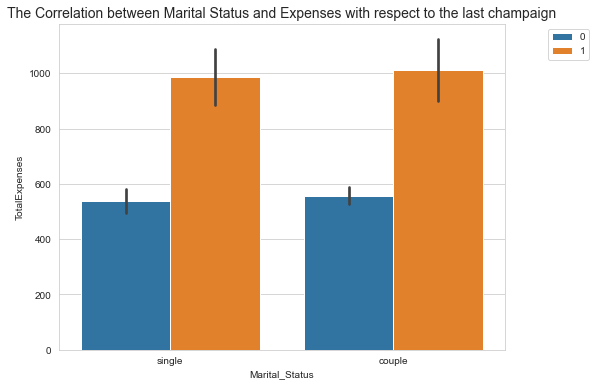

In [7]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES AND EDUCATION
plt.figure(figsize=(8,6))
sns.barplot(x=df['Marital_Status'], y=df['TotalExpenses'], hue = df["AcceptedCmp6"])
plt.title("The Correlation between Marital Status and Expenses with respect to the last champaign", fontsize=14)
plt.legend(bbox_to_anchor= (1.2, 1))
plt.show();
# observation: no matter signle or couple, customers with more expenses are more active to the last champaign.

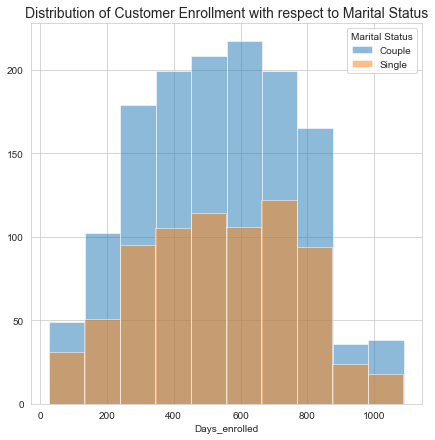

In [8]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES
plt.figure(figsize=(7,7))
plt.hist("Days_Enrolled", data = df[df["Marital_Status"] == "couple"], alpha = 0.5, label = "Couple")
plt.hist("Days_Enrolled", data = df[df["Marital_Status"] == "single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Customer Enrollment with respect to Marital Status", fontsize=14)
plt.xlabel("Days_enrolled")
plt.legend(title = "Marital Status")
plt.show()
# coupled customers have higher expenses

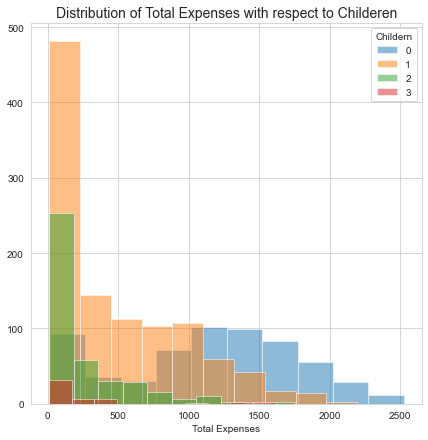

In [9]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES
plt.figure(figsize=(7,7))
plt.hist("TotalExpenses", data = df[df["Children"] == 0], alpha = 0.5, label = "0")
plt.hist("TotalExpenses", data = df[df["Children"] == 1], alpha = 0.5, label = "1")
plt.hist("TotalExpenses", data = df[df["Children"] == 2], alpha = 0.5, label = "2")
plt.hist("TotalExpenses", data = df[df["Children"] == 3], alpha = 0.5, label = "3")
plt.title("Distribution of Total Expenses with respect to Childeren", fontsize=14)
plt.xlabel("Total Expenses")
plt.legend(title = "Childern")
plt.show()
#obervation: customers without child have higher expenses

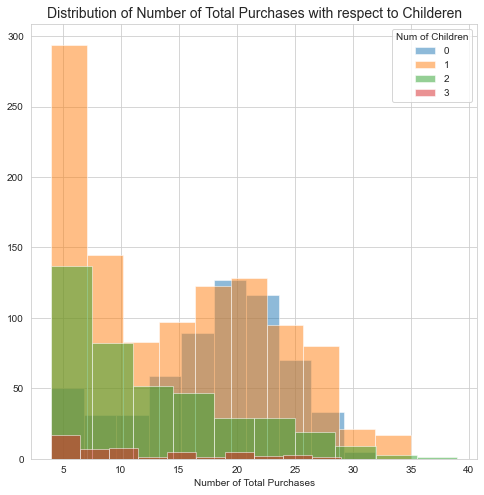

In [10]:
# DISTRIBUTION OF NUMBER OF TOTAL PURCHARSES WITH RESPECT TO CHILDREN
plt.figure(figsize=(8,8))
plt.hist("TotalNumPurchases", data = df[df["Children"] == 0], alpha = 0.5, label = "0")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 1], alpha = 0.5, label = "1")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 2], alpha = 0.5, label = "2")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 3], alpha = 0.5, label = "3")
plt.title("Distribution of Number of Total Purchases with respect to Childeren", fontsize=14)
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Num of Children")
plt.show();
# obervation: customers with '1' child have largest number of purchases and customers with '3' childeren the least 

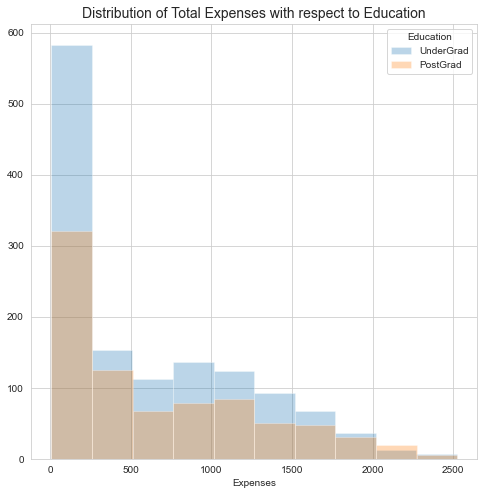

In [11]:
# ANALYSIS OF THE CORRELATION BETWEEN EDUCATION AND TOTAL EXPENSES
plt.figure(figsize=(8,8))
plt.hist("TotalExpenses", data = df[df["Education"] == "Undergrad"], alpha = 0.3, label = "UnderGrad")
plt.hist("TotalExpenses", data = df[df["Education"] == "Postgrad"], alpha = 0.3, label = "PostGrad")
plt.title("Distribution of Total Expenses with respect to Education", fontsize=14)
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show();
# obervation: most customers with 'undergrad' education have higer expenses

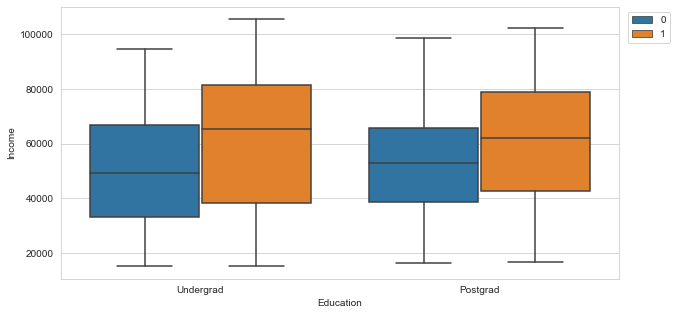

In [12]:
# 'Education' vs 'Income'
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Education', y='Income', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
# observation: customers with higher income & undergrad background are more active with responses to the last champaign

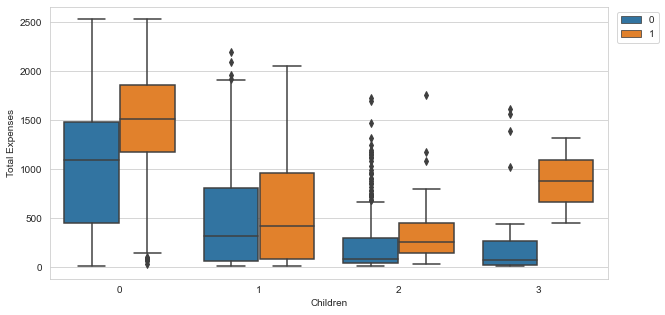

In [13]:
# in this case, family with 3 childern seems not responding to the last champaign
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Children', y='TotalExpenses', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Children')
plt.ylabel('Total Expenses')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
# observation: cutomers with '0' children are more active with more responses to the last champaign

In [14]:
# use pd.cut() to separate ages into groups
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

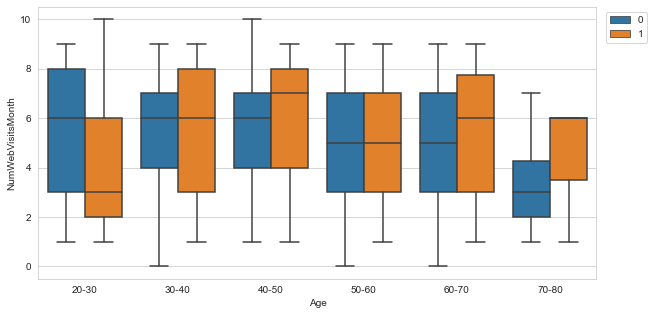

In [15]:
# 'number web visits' ; 
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Age_group', y='NumWebVisitsMonth', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('NumWebVisitsMonth')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
#obervation: customers at age 40-50 have most web visits and more responses to the last champaign

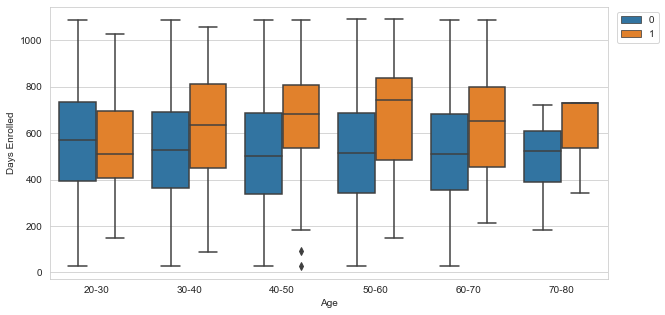

In [16]:
# 'Days enrolled' ; 
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Age_group', y='Days_Enrolled', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('Days Enrolled')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
#obervation: customers at with longer enrolled days are more active and have more responses to the last champaign

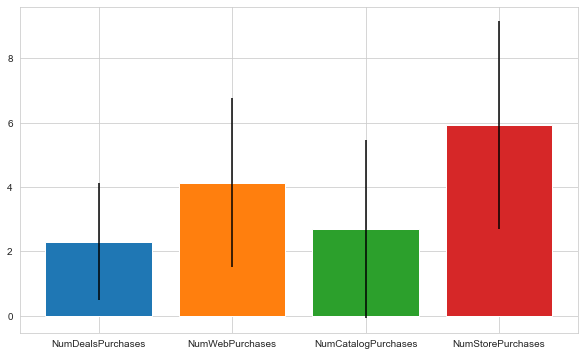

In [17]:
# number of purchases 
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar("NumDealsPurchases", df['NumDealsPurchases'].mean(), yerr=df['NumDealsPurchases'].std())
ax.bar("NumWebPurchases", df['NumWebPurchases'].mean(), yerr=df['NumWebPurchases'].std())
ax.bar("NumCatalogPurchases",df['NumCatalogPurchases'].mean(), yerr=df['NumCatalogPurchases'].std())
ax.bar("NumStorePurchases",df['NumStorePurchases'].mean(), yerr=df['NumStorePurchases'].std())
plt.show(); 
# observation: the number of store purchase is the largest comapre to the others

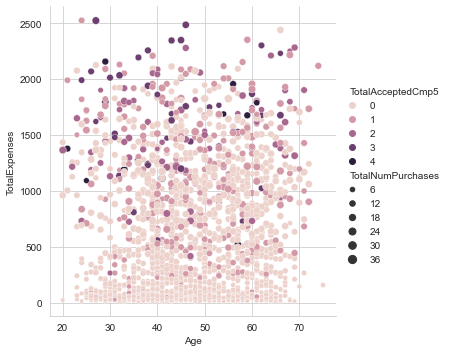

In [18]:
sns.relplot(x='Age', y='TotalExpenses', data=df,
            kind='scatter', size='TotalNumPurchases', hue='TotalAcceptedCmp5');
# customers with more expenses are more active to responde to offers

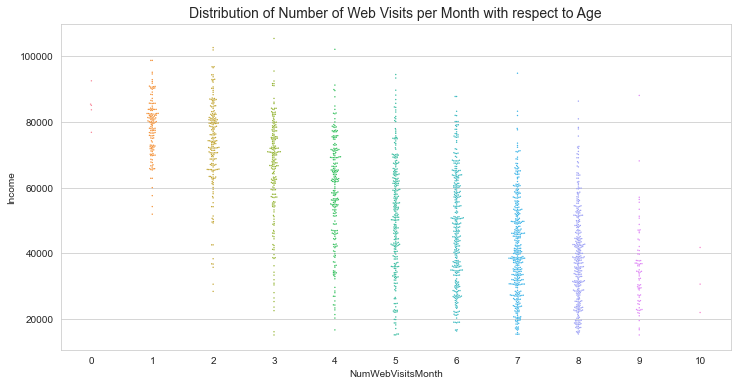

In [19]:
# 'NumWebVisitsMonth'
plt.subplots(figsize=(12, 6))
sns.swarmplot(y='Income', x='NumWebVisitsMonth', data=df, size=1.4)
plt.title("Distribution of Number of Web Visits per Month with respect to Age", fontsize=14);
#obervation: customers of age at 40-50 have more web visits

 **The effectiveness of the promotional campaign**

In [20]:
# six champaigns
cmp = ["1st","2nd","3rd","4th","5th","6th"]  
results = [df['AcceptedCmp1'].sum(),df['AcceptedCmp2'].sum(),df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(),df['AcceptedCmp5'].sum(),  df['AcceptedCmp6'].sum()]
perc = [round(x *100 /2078, 2) for x in results]

arr = np.array([cmp, results, perc]).T
df_cmp = pd.DataFrame(arr, columns=['champaign', 'results', 'accpt_rate']).set_index('champaign').astype('float64')
df_cmp
# obervation: on average, the last campaign has the highest accepted rate

,results,accpt_rate
champaign,,
1st,142.0,6.83
2nd,30.0,1.44
3rd,158.0,7.60
4th,164.0,7.89
5th,161.0,7.75
6th,328.0,15.78


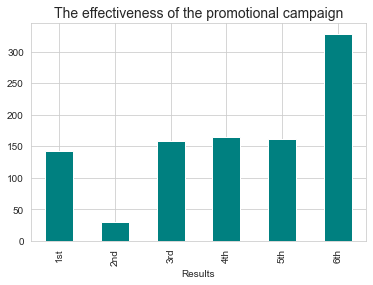

In [21]:
df_cmp['results'].plot(kind='bar', color='teal')
plt.xlabel('Results')
plt.title('The effectiveness of the promotional campaign', fontsize=14)
plt.show();

### Visualizing High Dimensional Features

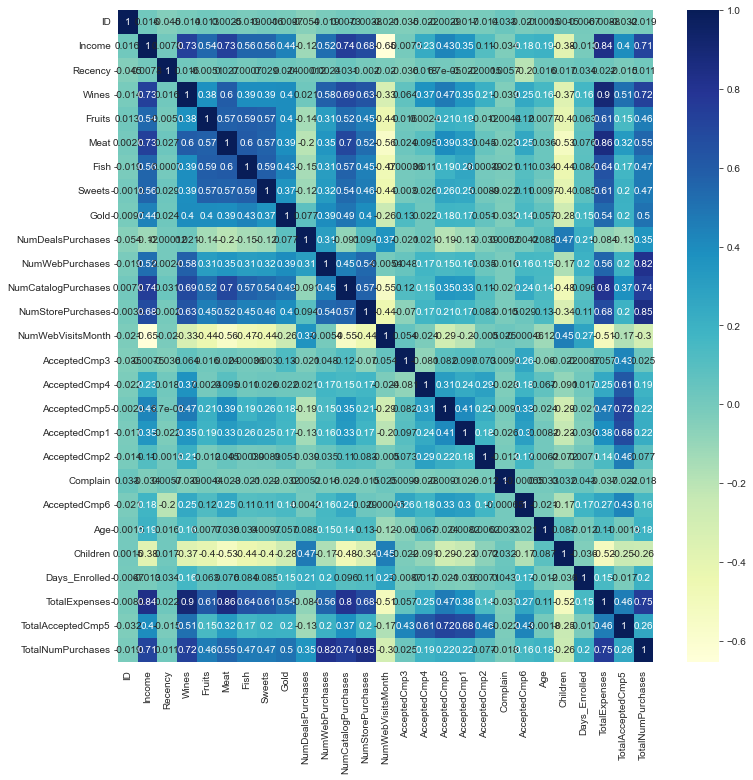

In [22]:
# Make a heatmap of the data checking correlation between features
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True,cmap="YlGnBu");  # corr.style.background_gradient(cmap='viridis')

In [23]:
c = corr.abs().unstack().drop_duplicates().reset_index()
c = c.rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Correlation'})
c = c.query('.7 <= Correlation < 1').sort_values(by = 'Correlation', ascending = False).reset_index(drop=True)
c.style.background_gradient(cmap='Set1_r')
# Some features are more correlated with one another than others.

,feature 1,feature 2,Correlation
0,Wines,TotalExpenses,0.897138
1,Meat,TotalExpenses,0.859868
2,NumStorePurchases,TotalNumPurchases,0.845577
3,Income,TotalExpenses,0.837203
4,NumWebPurchases,TotalNumPurchases,0.817799
5,NumCatalogPurchases,TotalExpenses,0.803168
6,TotalExpenses,TotalNumPurchases,0.754787
7,NumCatalogPurchases,TotalNumPurchases,0.744083
8,Income,NumCatalogPurchases,0.741942
9,Income,Wines,0.734956


#### PCA
This technique will find linear combinations of the original features and these new features are uncorrelated with one another and keep maximum amount of variance in the data. The new derived features are in a lower dimension, easy for visualization and exploring how much variance the new features explain and how the original features contribute to these new features.

In [24]:
df_new = df.copy(deep=True) 

In [25]:
to_drop = ['Education', 'Marital_Status', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Age_group']
df_new.drop(columns=to_drop, inplace=True)

In [26]:
df_new_scale = df_new.set_index('ID')
#Save the labels
df_new_index = df_new_scale.index
#Save the column names
df_new_columns = df_new_scale.columns
df_new_scale.head()

,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases
ID,,,,,,,
5524,58138.0,58,0,997,1617,0,25
2174,46344.0,61,2,151,27,0,6
4141,71613.0,50,0,498,776,0,21
6182,26646.0,31,1,91,53,0,8
5324,58293.0,34,1,347,422,0,19


In [27]:
#scale the data
df_new_scale = scale(df_new_scale)

In [28]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
scaled_df = pd.DataFrame(df_new_scale, columns=df_new_columns)
scaled_df.head()

,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases
0,0.278690,1.007588,-1.267649,1.989350,1.656195,-0.443485,1.317665
1,-0.315758,1.265038,1.395094,-1.662860,-0.982789,-0.443485,-1.193835
2,0.957864,0.321055,-1.267649,-0.164850,0.260355,-0.443485,0.788928
3,-1.308587,-1.309461,0.063723,-1.921882,-0.939635,-0.443485,-0.929466
4,0.286502,-1.052011,0.063723,-0.816722,-0.327192,-0.443485,0.524560


#### Verifying the scaling 

In [29]:
#scaled data mean = zero
scaled_df.mean().head()

Income           1.669373e-16
Age             -2.787939e-16
Children        -8.171902e-17
Days_Enrolled    2.302991e-16
TotalExpenses    3.724819e-17
dtype: float64

In [30]:
# ddof =0 biased estimate of std (default ddof=1, the best estimate of the population parameter based on the given sample)
# scaled data std =1.0
scaled_df.std(ddof=0).head()

Income           1.0
Age              1.0
Children         1.0
Days_Enrolled    1.0
TotalExpenses    1.0
dtype: float64

#### Calculate the PCA transformation

In [31]:
# Fit the PCA transformation using the scaled data.
model = PCA().fit(df_new_scale)

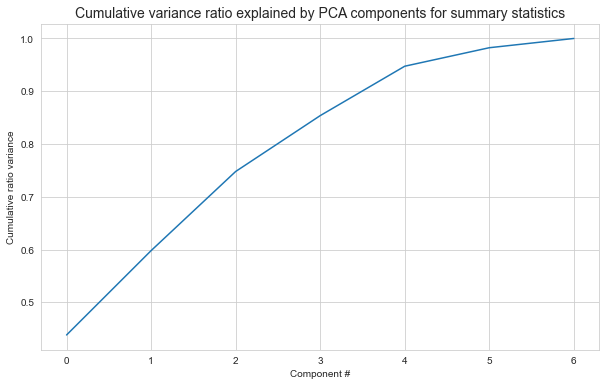

In [32]:
#create a line plot to visualize the cumulative explained variance ratio with number of components
plt.subplots(figsize=(10, 6))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for summary statistics', fontsize=14);

**The first two components seem to account for about 60% of the variance, and the first five for over 95%.**

In [33]:
# Apply the transformation to the data to obtain the new derived features.
new_dim_x = model.transform(df_new_scale)

In [34]:
new_dim_x.shape

(2152, 7)

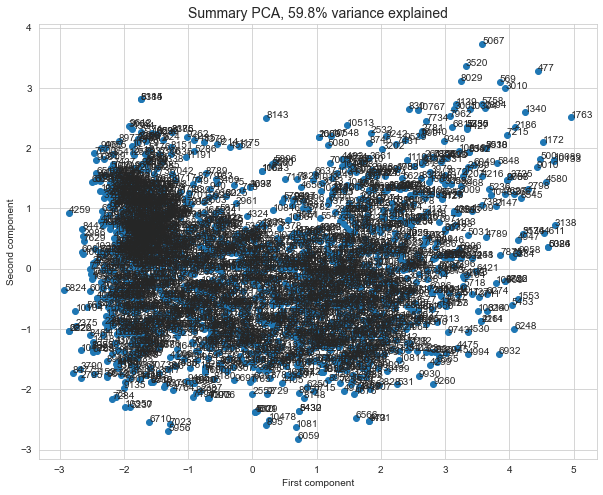

In [35]:
# extract the first and second columns from the transformed data as x and y coordinates for plotting.
# the second (index 1) value of the cumulative variance ratio
# visualizing the percentage variance explained by the two PCA components
x = new_dim_x[:, 0]
y = new_dim_x[:, 1]
customer_id = df_new['ID']
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Summary PCA, {pc_var:.1f}% variance explained', fontsize=14)
for s, x, y in zip(customer_id, x, y):
    plt.annotate(s, (x, y))

In [36]:
df_new.loc[df_new['ID'] == 1763]

,ID,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases
1434,1763,87679.0,27,0,523,2524,3,29


In [37]:
#Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': new_dim_x[:, 0], 'PC2': new_dim_x[:, 1]}, index=df_new_index)
pca_df.head()

,PC1,PC2
ID,,
5524,2.204141,-1.010847
2174,-1.859527,-1.159915
4141,1.293142,-0.040916
6182,-2.074152,1.533213
5324,-0.121778,0.666323


In [38]:
# concatenate `pca_df` and `Total` along axis 1 ; align on index
pca_df = pd.concat([pca_df, scaled_df['Income']], axis=1)

In [39]:
# Quartile is a new data type: category
pca_df['Quartile'] = pd.qcut(pca_df['Income'], q=4, precision=1)
pca_df.head()

,PC1,PC2,Income,Quartile
0,1.278818,1.341953,0.278690,"(-0.02, 0.8]"
1,0.940956,0.495634,-0.315758,"(-0.8, -0.02]"
2,NaN,NaN,0.957864,"(0.8, 2.7]"
3,NaN,NaN,-1.308587,"(-2.0, -0.8]"
4,NaN,NaN,0.286502,"(-0.02, 0.8]"


In [40]:
pca_df.dtypes

PC1          float64
PC2          float64
Income       float64
Quartile    category
dtype: object

In [41]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,Income,Quartile
2,NaN,NaN,0.957864,"(0.8, 2.7]"
3,NaN,NaN,-1.308587,"(-2.0, -0.8]"
4,NaN,NaN,0.286502,"(-0.02, 0.8]"
5,NaN,NaN,0.499201,"(-0.02, 0.8]"
6,NaN,NaN,0.152532,"(-0.02, 0.8]"
...,...,...,...,...
11176,0.060073,0.180418,NaN,NaN
11178,-1.698017,0.593899,NaN,NaN
11187,-1.766249,0.699791,NaN,NaN
11188,-2.106853,-1.087873,NaN,NaN


In [42]:
pca_df.Income.fillna(pca_df.Income.mean(),inplace=True)
#pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
#pca_df['Quartile'].fillna('NA', inplace=True)
pca_df['Quartile'].dropna(inplace=True)

In [ ]:
# legend with points coloured by quartile and sized by ''
x = pca_df.PC1
y = pca_df.PC2

quartiles = pca_df.Quartile
customer = pca_df.index
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
s = df_new['Income']

fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=s[im]*0.003, label=q) # s=s[im]

ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Summary PCA, {pc_var:.1f}% variance explained',fontsize=14)
for s, x, y in zip(customer, x, y):
    plt.annotate(s, (x, y))
plt.show();

**observations:**
- The red points representing the upper quartile of 'income' and it spreads across the first dimension. There's also a spread of the other quartiles as well. 
- In this representation, the two principal components account for some 60% of the variance in the data. 

In [ ]:
# The components_ attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score
pd.DataFrame(model.components_, columns=df_new_columns)

In [ ]:
# add back 2 categorical columns
df_eda = pd.concat([df_new, df[['Education', 'Marital_Status','AcceptedCmp6']]], axis=1)
df_eda.head()

### Saving the data

In [ ]:
print("The new dataset has {} rows and {} columns.".format(df_eda.shape[0], df_eda.shape[1]))

In [ ]:
# save the data to a new csv file
datapath = './Data'
save_file(df_eda, '02_EDA.csv', datapath)